In [1]:
import azure.cosmos.documents as documents
import azure.cosmos.cosmos_client as cosmos_client
import azure.cosmos.exceptions as exceptions
from azure.cosmos.partition_key import PartitionKey
import requests, os, json
import matplotlib.pyplot as plt

In [2]:
# Define un diccionario llamado "settings" que contiene la configuración para Azure Cosmos DB
settings = {
    'host': os.environ.get('ACCOUNT_HOST', ''),  # Obtiene el valor del host de la variable de entorno ACCOUNT_HOST, si no está definida, utiliza un valor predeterminado
    'master_key': os.environ.get('ACCOUNT_KEY', ''),  # Obtiene el valor de la clave maestra de la variable de entorno ACCOUNT_KEY, si no está definida, utiliza un valor predeterminado
    'database_id': os.environ.get('COSMOS_DATABASE', ''),  # Obtiene el nombre de la base de datos de la variable de entorno COSMOS_DATABASE, si no está definida, utiliza un valor predeterminado
    'container_id': os.environ.get('COSMOS_CONTAINER','')  # Obtiene el nombre del contenedor de la variable de entorno COSMOS_CONTAINER, si no está definida, utiliza un valor predeterminado
}

# Asigna los valores de la configuración a variables individuales para facilitar su uso
api_key = ""
HOST = settings['host']  # La URL del servicio de Azure Cosmos DB
MASTER_KEY = settings['master_key']  # La clave maestra para acceder al servicio de Azure Cosmos DB
DATABASE_ID = settings['database_id']  # El ID de la base de datos en Azure Cosmos DB
CONTAINER_ID = settings['container_id']  # El ID del contenedor en Azure Cosmos DB

In [3]:
client = cosmos_client.CosmosClient(HOST, {'masterKey': MASTER_KEY}, user_agent="CosmosDBPythonQuickstart", user_agent_overwrite=True)

In [4]:
# Obtiene el cliente de la base de datos
db = client.get_database_client(DATABASE_ID)

# Obtiene el cliente del contenedor dentro de la base de datos
container = db.get_container_client(CONTAINER_ID)

# Define la consulta SQL para seleccionar elementos con partitionKey igual a 1
query = 'SELECT * FROM c WHERE c.partitionKey = 1 '

# Ejecuta la consulta en el contenedor, permitiendo consultas entre particiones
response = container.query_items(query, enable_cross_partition_query=True)

# Inicializa contadores para diferentes niveles de prioridad
HIGH = 0
MEDIUM = 0
LOW = 0
CRITICAL = 0


In [5]:
# Itera sobre cada elemento en la respuesta de la consulta
for i in response:
    # Accede al diccionario de 'vulnerabilities' dentro de cada elemento
    vulnerabilities = i.get('vulnerabilities', {})

    # Itera sobre cada CVE y su información asociada
    for cve_key, vulnerability_info in vulnerabilities.items():
        # Obtiene el valor de 'Base Severity' de la vulnerabilidad
        base_severity = vulnerability_info.get('Base Severity', 'Unknown Severity')
        # Incrementa los contadores según el nivel de severidad de la vulnerabilidad
        if base_severity == "HIGH":
            HIGH = HIGH + 1
        elif base_severity == "MEDIUM":
            MEDIUM = MEDIUM + 1
        elif base_severity == "LOW":
            LOW = LOW + 1
        else:
            CRITICAL = CRITICAL + 1

HIGH:  0 MEDIUM:  1 LOW:  0 CRITICAL:  0
HIGH:  1 MEDIUM:  1 LOW:  0 CRITICAL:  0
HIGH:  2 MEDIUM:  1 LOW:  0 CRITICAL:  0
HIGH:  3 MEDIUM:  1 LOW:  0 CRITICAL:  0
HIGH:  4 MEDIUM:  1 LOW:  0 CRITICAL:  0
HIGH:  4 MEDIUM:  2 LOW:  0 CRITICAL:  0
HIGH:  4 MEDIUM:  3 LOW:  0 CRITICAL:  0
HIGH:  4 MEDIUM:  4 LOW:  0 CRITICAL:  0
HIGH:  5 MEDIUM:  4 LOW:  0 CRITICAL:  0
HIGH:  5 MEDIUM:  5 LOW:  0 CRITICAL:  0
HIGH:  5 MEDIUM:  6 LOW:  0 CRITICAL:  0
HIGH:  5 MEDIUM:  6 LOW:  1 CRITICAL:  0
HIGH:  5 MEDIUM:  6 LOW:  2 CRITICAL:  0
HIGH:  5 MEDIUM:  7 LOW:  2 CRITICAL:  0
HIGH:  5 MEDIUM:  8 LOW:  2 CRITICAL:  0
HIGH:  5 MEDIUM:  9 LOW:  2 CRITICAL:  0
HIGH:  5 MEDIUM:  10 LOW:  2 CRITICAL:  0
HIGH:  5 MEDIUM:  11 LOW:  2 CRITICAL:  0
HIGH:  5 MEDIUM:  12 LOW:  2 CRITICAL:  0
HIGH:  5 MEDIUM:  13 LOW:  2 CRITICAL:  0
HIGH:  5 MEDIUM:  14 LOW:  2 CRITICAL:  0
HIGH:  5 MEDIUM:  15 LOW:  2 CRITICAL:  0
HIGH:  5 MEDIUM:  16 LOW:  2 CRITICAL:  0
HIGH:  5 MEDIUM:  17 LOW:  2 CRITICAL:  0
HIGH:  5

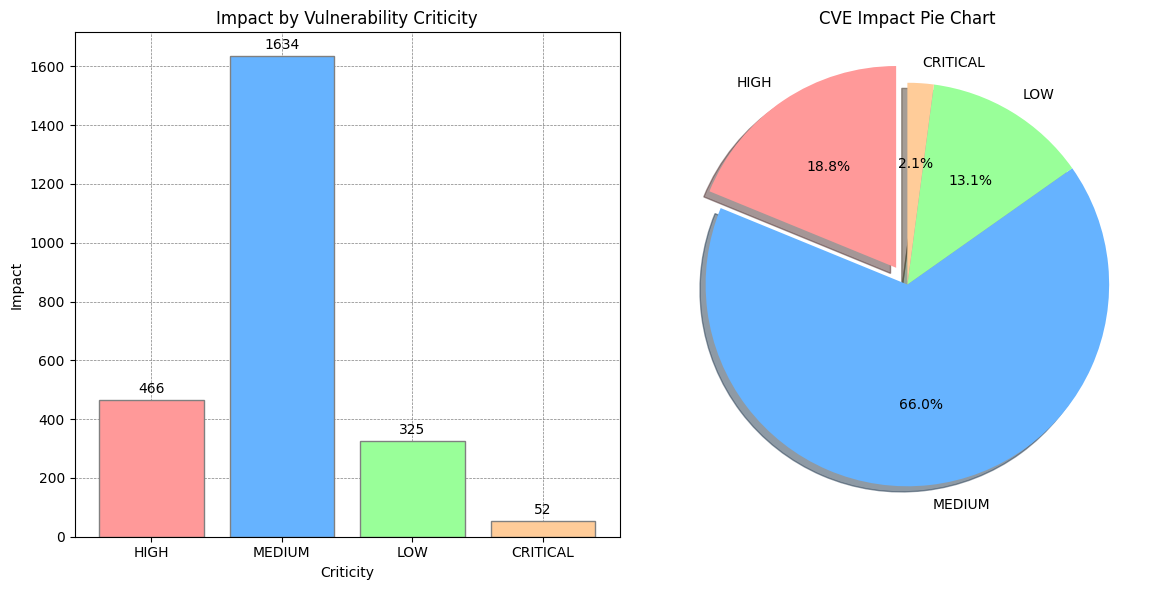

In [6]:
# Datos para el gráfico
categorias = ['HIGH', 'MEDIUM', 'LOW', 'CRITICAL']
valores = [HIGH, MEDIUM, LOW, CRITICAL]

# Configuración de colores y estilo
colores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Crear gráfico de barras y pastel en el mismo dashboard (más compacto)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico de barras
ax1.bar(categorias, valores, color=colores, edgecolor='grey', linewidth=1, zorder=2)
ax1.set_title('Impact by Vulnerability Criticity')
ax1.set_xlabel('Criticity')
ax1.set_ylabel('Impact')
ax1.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', zorder=0)

# Añadir etiquetas de texto sobre cada barra para mostrar la cantidad exacta
for bar in ax1.containers[0]:
    height = bar.get_height()
    ax1.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                 textcoords="offset points", ha='center', va='bottom')

# Gráfico de pastel
ax2.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=90, colors=colores,
        explode=(0.1, 0, 0, 0), shadow=True)
ax2.set_title('CVE Impact Pie Chart')

# Ajustar el layout para que no haya espacios innecesarios
plt.tight_layout()

# Mostrar el gráfico
plt.show()

